In [32]:
import pandas as pd
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

החלפת קובץ בהתאם למשתמשCHARTEVENTS   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
 url_icd_diagnoses ='/content/drive/MyDrive/D_ICD_DIAGNOSES.csv'

#url_chartevents = '/content/drive/MyDrive/למידת מכונה ברפואה/CHARTEVENTS.csv'
 url_chartevents = '/content/drive/MyDrive/CHARTEVENTS.csv'# ריצה מדור

In [34]:

# כתובות URL של הקבצים
url_admissions = 'https://raw.githubusercontent.com/aviya-gmara/medical-data-analysis-and-ML/main/ADMISSIONS.csv'

url_diagnoses_icd = 'https://raw.githubusercontent.com/aviya-gmara/medical-data-analysis-and-ML/main/DIAGNOSES_ICD.csv'
url_icustays = 'https://raw.githubusercontent.com/aviya-gmara/medical-data-analysis-and-ML/main/ICUSTAYS.csv'
url_patients = 'https://raw.githubusercontent.com/aviya-gmara/medical-data-analysis-and-ML/main/PATIENTS.csv'
url_labevents = 'https://raw.githubusercontent.com/aviya-gmara/medical-data-analysis-and-ML/main/LABEVENTS.csv'

# קריאת הנתונים לתוך משתני pandas
admissions = pd.read_csv(url_admissions)
chartevents = pd.read_csv(url_chartevents)
diagnoses_icd = pd.read_csv(url_diagnoses_icd)
icustays = pd.read_csv(url_icustays)
patients = pd.read_csv(url_patients)
labevents = pd.read_csv(url_labevents)
d_icd_diagnoses = pd.read_csv(url_icd_diagnoses)


# # הצגת שורות ראשונות מכל טבלה לוודא טעינה נכונה
# # admissions.head()
# # chartevents.head()
# # diagnoses_icd.head()
# # icustays.head()
# # patients.head()
# # labevents.head()


<ipython-input-34-be25582450af>:11: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents = pd.read_csv(url_chartevents)


In [35]:
# # הצגת שורות ראשונות מכל טבלה לוודא טעינה נכונה
# admissions.head()
# chartevents.head()
# diagnoses_icd.head()
# icustays.head()
# patients.head()
labevents.head()

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
0,6244563,10006,NaN,50868,2164-09-24 20:21:00,19,19.0,mEq/L,NaN
1,6244564,10006,NaN,50882,2164-09-24 20:21:00,27,27.0,mEq/L,NaN
2,6244565,10006,NaN,50893,2164-09-24 20:21:00,10.0,10.0,mg/dL,NaN
3,6244566,10006,NaN,50902,2164-09-24 20:21:00,97,97.0,mEq/L,NaN
4,6244567,10006,NaN,50912,2164-09-24 20:21:00,7.0,7.0,mg/dL,abnormal


# בדיקת ערכים חסרים

In [36]:
# פונקציה להדפסת מספר רשומות ובדיקת ערכים חסרים
def print_table_info(df, table_name):
    print(f"\nTable: {table_name}")
    print(f"Number of records: {len(df)}")
    print("Missing values:")
    print(df.isnull().sum())

# הדפסת מידע עבור כל טבלה
print_table_info(admissions, "ADMISSIONS")
print_table_info(chartevents, "CHARTEVENTS")
print_table_info(diagnoses_icd, "DIAGNOSES_ICD")
print_table_info(icustays, "ICUSTAYS")
print_table_info(patients, "PATIENTS")
print_table_info(labevents, "LABEVENTS")


Table: ADMISSIONS
Number of records: 129
Missing values:
row_id                   0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
discharge_location       0
insurance                0
language                48
religion                 1
marital_status          16
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
has_chartevents_data     0
dtype: int64

Table: CHARTEVENTS
Number of records: 758355
Missing values:
row_id               0
subject_id           0
hadm_id              0
icustay_id          81
itemid               0
charttime            0
storetime            0
cgid                 0
value            32848
valuenum        434471
valueuom        518500
warning         376076
error           376076
resultstatus    736681
stopped         383706
dtype: in

In [37]:
admissions[admissions['deathtime'].isna()]

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
5,12277,10026,103770,2195-05-17 07:39:00,2195-05-24 11:45:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,NaN,OTHER,NaN,WHITE,2195-05-17 01:49:00,2195-05-17 08:29:00,STROKE/TIA,0,1
6,12278,10027,199395,2190-07-13 07:15:00,2190-07-25 14:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,MITRAL REGURGITATION;CORONARY ARTERY DISEASE\...,0,1
7,12280,10029,132349,2139-09-22 10:58:00,2139-10-02 14:29:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,PROTESTANT QUAKER,DIVORCED,WHITE,2139-09-22 06:03:00,2139-09-22 11:50:00,SYNCOPE;TELEMETRY,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,41054,44083,131048,2112-05-22 15:37:00,2112-05-25 13:30:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,CATHOLIC,SINGLE,WHITE,2112-05-22 09:25:00,2112-05-22 17:04:00,SHORTNESS OF BREATH,0,1
124,41055,44083,198330,2112-05-28 15:45:00,2112-06-07 16:50:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,ENGL,CATHOLIC,SINGLE,WHITE,2112-05-28 13:16:00,2112-05-28 17:30:00,PERICARDIAL EFFUSION,0,1
126,41087,44212,163189,2123-11-24 14:14:00,2123-12-30 14:31:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,REHAB/DISTINCT PART HOSP,Medicare,ENGL,UNOBTAINABLE,SINGLE,BLACK/AFRICAN AMERICAN,NaN,NaN,ACUTE RESPIRATORY DISTRESS SYNDROME;ACUTE RENA...,0,1
127,41090,44222,192189,2180-07-19 06:55:00,2180-07-20 13:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicare,ENGL,CATHOLIC,SINGLE,WHITE,2180-07-19 04:50:00,2180-07-19 08:23:00,BRADYCARDIA,0,1


In [38]:
admissions[(admissions['deathtime'].isna()) &(admissions['hospital_expire_flag']==1)]


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data


ראינו שישנם ערכים חסרים

Deathtime

בטבלת

admission

בדקנו אם קיימים ערכים חסרים עבור אנשים שאכן מתו ומצאנו שלא.
לכן, נוכל להחליף את הערך


NULL

בזה שאין מוות

נשלים ערכים חסרים של **"ערך"** הדיקות החסרות.


נבצע את ההשלמה לפי הדגל שמחליט אם הוא **נורמאלי או לא**. אנחנו לא נשלים ערכים שמוגרים לא נורמאליים מכיוון שאין לנו דרך לדעת בכמה הוא סטה ואם הוא נמוך יותר או גבוה יותר מהטווח הנורמאלי.


אולם, במקרים בהם הדגל מראה שהבדירה היא **נורמאלית** נשלים את הערך לפי הממוצע של הבדיקות הנורמאליות משאר הנתונים

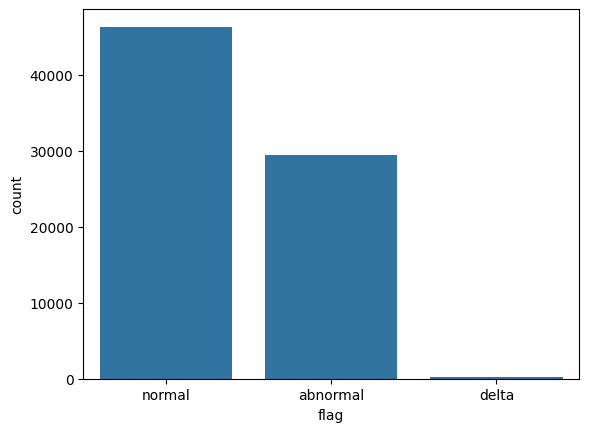

In [39]:
# prompt: תציג לי גרף של bar שמראה את ההתפלגות של ה flag
# אם אחד מהערכים הוא ריק אז תציג אותו כ normally

import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for the flag, replacing missing values with "normally"
labevents['flag'] = labevents['flag'].fillna('normal')

# Create a bar chart of the flag distribution
sns.countplot(x='flag', data=labevents)
plt.show()


In [40]:
labevents[labevents['value'].isna()]

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
24355,6288722,10117,NaN,51508,2138-09-26 09:38:00,NaN,NaN,NaN,normal
32684,6300957,10126,160445.0,51274,2171-08-06 11:17:00,NaN,NaN,sec,abnormal
40608,19951873,40310,186361.0,51196,2144-07-23 16:32:00,NaN,NaN,NaN,normal
40706,19951971,40310,186361.0,51196,2144-07-24 04:54:00,NaN,NaN,NaN,normal
41184,19952449,40310,186361.0,51196,2144-07-28 04:14:00,NaN,NaN,NaN,normal


In [41]:

# סינון רק לערכים נומריים
labevents['value_numeric'] = pd.to_numeric(labevents['value'], errors='coerce')

# חישוב הממוצע של הבדיקות הנורמליות עבור כל סוג בדיקה (itemid)
normal_means = labevents[labevents['flag'] == 'normal'].groupby('itemid')['value_numeric'].mean()

# פונקציה להשלמת ערכים חסרים
def fill_missing_values(row, normal_means):
    if pd.isnull(row['value']) and row['flag'] == 'normal':
        return normal_means.get(row['itemid'], row['value'])
    return row['value']

# השלמת הערכים החסרים בעמודת value כאשר הדגל הוא נורמאלי
labevents['value'] = labevents.apply(lambda row: fill_missing_values(row, normal_means), axis=1)

# בדוק את השלמת הערכים החסרים
missing_values_after = labevents['value'].isnull().sum()
print(f"מספר הערכים החסרים בעמודת value בטבלת labevents אחרי ההשלמה: {missing_values_after}")
labevents[labevents['value'].isna()]

מספר הערכים החסרים בעמודת value בטבלת labevents אחרי ההשלמה: 2


,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag,value_numeric
24355,6288722,10117,NaN,51508,2138-09-26 09:38:00,NaN,NaN,NaN,normal,NaN
32684,6300957,10126,160445.0,51274,2171-08-06 11:17:00,NaN,NaN,sec,abnormal,NaN


In [42]:
labevents[labevents['itemid'] == 51508]

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag,value_numeric
691,6245256,10006,142345.0,51508,2164-10-23 17:40:00,Yellow,NaN,NaN,normal,NaN
985,6245550,10006,NaN,51508,2164-11-16 05:30:00,Yellow,NaN,NaN,normal,NaN
1165,6245742,10006,NaN,51508,2165-01-21 21:15:00,Straw,NaN,NaN,normal,NaN
1751,6246332,10006,NaN,51508,2165-06-02 22:30:00,Straw,NaN,NaN,normal,NaN
2027,6247479,10011,105331.0,51508,2126-08-15 01:30:00,Orange,NaN,NaN,normal,NaN
...,...,...,...,...,...,...,...,...,...,...
71979,20446795,44212,163189.0,51508,2123-11-24 14:41:00,Amber,NaN,NaN,normal,NaN
75076,20450321,44222,192189.0,51508,2180-07-19 14:31:00,Yellow,NaN,NaN,normal,NaN
75133,20450378,44222,NaN,51508,2180-08-30 11:15:00,Yellow,NaN,NaN,normal,NaN
75708,20452318,44228,103379.0,51508,2170-12-15 03:20:00,Yellow,NaN,NaN,normal,NaN


שמנו לב שיש ערך אחד שמוגדר נורמאלי ועדיין לא הצלחנו להשלים לו את ה ממוצע.

לכן בדקנו את התוצאות האפשריות של הבדיקה הזאת וראינו שהיא מציינת **צבעים** כתוצאה. בנוסף ראינו שעבור ערך שמוגדר נורמאלי יכול להיות יותר מצבע אחד. מכיוון שאין דרך וודאית לדעת איזה מבע הוא קיבל בבדיקה העדפנו לא להשלים את הערך הזה כדי לא לגרום לטעויות הנתונים שנעבוד איתם


------------------

## סקירת דאטה ראשונית

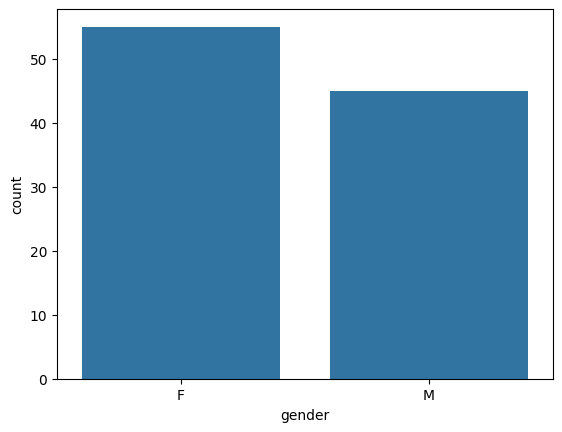

In [43]:
# prompt: בטבלת
# chartevents
# אני רוצה לראות את ההתפלגות של
# warning

import matplotlib.pyplot as plt
sns.countplot(x="gender", data=patients)
plt.show()


In [44]:
# סינון הנתונים כך שיכללו רק רשומות שבהן flag הוא "normal"
normal_labevents = labevents[labevents['flag'] == 'normal']

# המרת עמודת value לערכים מספריים (ignoring errors)
normal_labevents['value'] = pd.to_numeric(normal_labevents['value'], errors='coerce')

# הסרת ערכים שאינם מספריים
normal_labevents = normal_labevents.dropna(subset=['value'])

# ביצוע group by לפי itemid וחישוב המקסימום והמינימום של valuenum לכל קבוצה
grouped_normal_labevents = normal_labevents.groupby('itemid')['value'].agg(['min', 'max']).reset_index()

# הצגת התוצאות
grouped_normal_labevents


<ipython-input-44-c1589213fcb3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_labevents['value'] = pd.to_numeric(normal_labevents['value'], errors='coerce')


,itemid,min,max
0,50801,137.0,644.0
1,50802,-29.0,20.0
2,50803,21.0,29.0
3,50804,16.0,38.0
4,50805,1.0,4.0
...,...,...,...
227,51501,5.0,5.0
228,51514,0.2,1.0
229,51516,0.0,5.0
230,51529,120.0,120.0


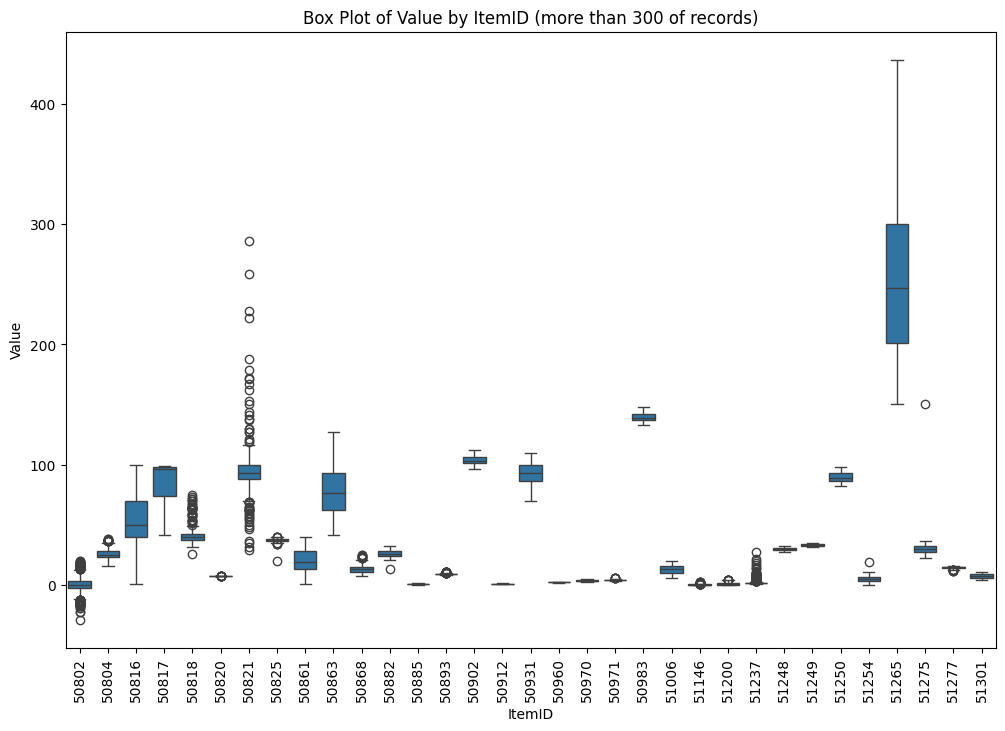

In [45]:
import seaborn as sns


# המרת עמודת value לערכים מספריים (ignoring errors)
normal_labevents['value'] = pd.to_numeric(normal_labevents['value'], errors='coerce')

# הסרת ערכים שאינם מספריים
normal_labevents = normal_labevents.dropna(subset=['value'])

# חישוב מספר הרשומות לכל itemid
itemid_counts = normal_labevents['itemid'].value_counts()


frequent_itemids = itemid_counts[itemid_counts > 300].index

# סינון הנתונים כך שיכללו רק את ה-itemid שנבחרו
filtered_normal_labevents = normal_labevents[normal_labevents['itemid'].isin(frequent_itemids)]

# יצירת box plot עבור ה-itemid הנבחרים
plt.figure(figsize=(12, 8))
sns.boxplot(x='itemid', y='value', data=filtered_normal_labevents)
plt.title('Box Plot of Value by ItemID (more than 300 of records)')
plt.xlabel('ItemID')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

# לבדוק התפלגויות חריגות

## התפלגות גילאים

מתוך אחת ההרצאות בשיעור נזכרנו שדובר על כך שיש אנשים בדאטה עם גיל 300 או יותר.

למעשה אנשים אלה הם בגיל 89 או יותר. התייחסנו לזה בקוד הבא.



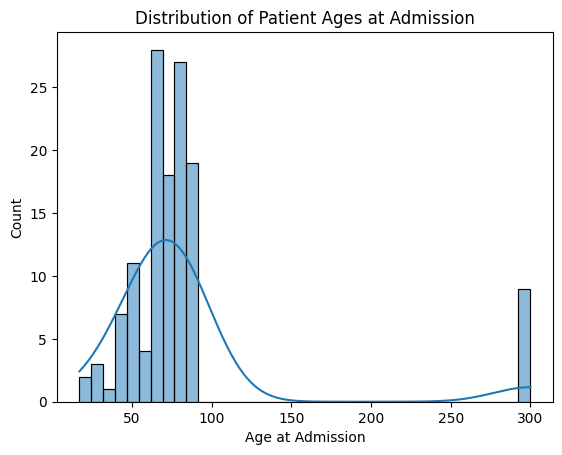

In [46]:

# המרת עמודות לתאריכים
admissions['admittime'] = pd.to_datetime(admissions['admittime'], errors='coerce')
patients['dob'] = pd.to_datetime(patients['dob'], errors='coerce')

# איחוד הנתונים על בסיס subject_id
data = pd.merge(patients[['subject_id', 'dob']], admissions[['subject_id', 'admittime']], on='subject_id')

# חישוב גיל בזמן האשפוז
data['age_at_admission'] = data.apply(lambda row: row['admittime'].year - row['dob'].year - ((row['admittime'].month, row['admittime'].day) < (row['dob'].month, row['dob'].day)), axis=1)
#print('outlaiers ages',data[data['age_at_admission']>299])
#data['age_at_admission'] = data['age_at_admission'].apply(lambda x: x - 211 if x >= 300 else x)
#print('outlaiers ages',data[data['age_at_admission']>299])

# סינון גילאים לא הגיוניים (למשל, גיל שלילי או גיל מעל 120)
#data = data[(data['age_at_admission'] >= 0) & (data['age_at_admission'] <= 120)]

# הצגת התפלגות הגילאים בזמן האשפוז
sns.histplot(data['age_at_admission'], kde=True)
plt.title('Distribution of Patient Ages at Admission')
plt.xlabel('Age at Admission')
plt.ylabel('Count')
plt.show()

### מהתפלגות הגילאים נראה כי מרבית המטופלים הם בדור השלישי לחייהם ובאופן טבעי יש לך השפעה על תוחלת החיים וההישרדות שלהם במהלך השהות בבית החולים


---



## יצירת משתנה המטרה

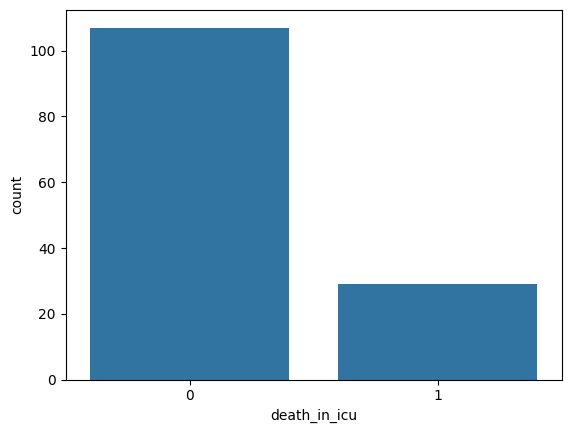

In [47]:
# איחוד נתוני האשפוז וה-ICU
merged_data = pd.merge(admissions, icustays, on=['subject_id', 'hadm_id'], how='inner')

# יצירת משתנה תמותה במהלך השהות ב-ICU
merged_data['death_in_icu'] = ((merged_data['deathtime'] >= merged_data['intime']) & (merged_data['deathtime'] <= merged_data['outtime']) & (merged_data['deathtime'].notna())).astype(int)

# איחוד נתוני ה-ICU עם נתוני האשפוז והמטופלים
data = pd.merge(patients[['subject_id', 'dob']], merged_data[['subject_id', 'hadm_id', 'admittime', 'death_in_icu', 'insurance', 'ethnicity']], on='subject_id')

# חישוב גיל בזמן האשפוז
data['age_at_admission'] = data.apply(lambda row: row['admittime'].year - row['dob'].year - ((row['admittime'].month, row['admittime'].day) < (row['dob'].month, row['dob'].day)), axis=1)
data['age_at_admission'] = data['age_at_admission'].apply(lambda x: x - 211 if x >= 300 else x)


# סינון גילאים לא הגיוניים (למשל, גיל שלילי או גיל מעל 120)
data = data[(data['age_at_admission'] >= 0) & (data['age_at_admission'] <= 120)]
# סינון למי שמת במיון


import matplotlib.pyplot as plt
sns.countplot(x="death_in_icu", data=data)
plt.show()


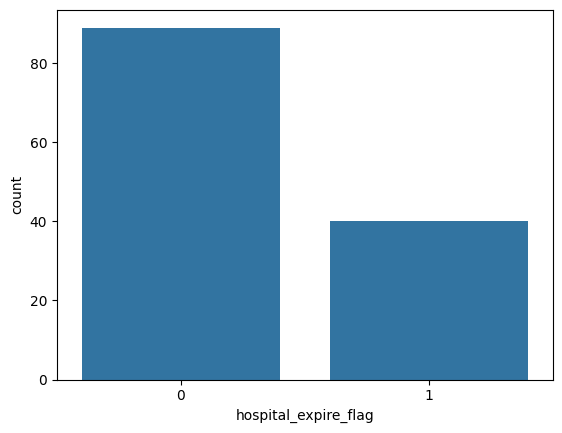

In [48]:
import matplotlib.pyplot as plt
sns.countplot(x="hospital_expire_flag", data=admissions)
plt.show()

בדיקת משנתנה המטרה בהשוואה בין ההבדלים בין מוות במהלך ה

**ICU**

לבין מוות במהלך השהות **הכוללת** בבית החולים

In [49]:
# בדיקת השוואה בין death_in_icu לבין hospital_expire_flag
comparison = merged_data[merged_data['death_in_icu'] != merged_data['hospital_expire_flag']]

# הצגת השוואה
# print(comparison[['subject_id', 'hadm_id', 'death_in_icu', 'hospital_expire_flag']])

# סינון העמודות להצגה
comparison_filtered = comparison[['subject_id', 'hadm_id','deathtime','outtime', 'death_in_icu', 'hospital_expire_flag']]

# הצגת התוצאות להבדלים
comparison_filtered

,subject_id,hadm_id,deathtime,outtime,death_in_icu,hospital_expire_flag
37,10094,122928,2180-03-20 18:00:00,2180-03-19 21:54:00,0,1
39,10101,142539,2128-03-24 19:00:00,2128-03-23 16:19:11,0,1
47,10117,105150,2138-11-18 23:13:00,2138-11-14 19:29:44,0,1
52,10124,170883,2192-05-15 19:28:00,2192-04-20 08:51:28,0,1
53,10124,170883,2192-05-15 19:28:00,2192-04-26 23:59:45,0,1
61,40177,198480,2169-05-12 08:54:00,2169-05-08 01:58:01,0,1
76,40687,129273,2155-03-12 15:00:00,2155-03-11 17:58:58,0,1
95,41983,107689,2151-09-15 00:45:00,2151-09-14 16:53:31,0,1
96,42033,154156,2131-07-28 16:02:00,2131-07-28 14:08:24,0,1
97,42066,171628,2112-02-11 12:00:00,2112-02-09 17:07:09,0,1


לאחר שערכנו בדיקה אם יש חפיפה בין המשתנה הנתון בטבלה שמציין מוות לבין השתנה שאנחנו יצרנו שאמור לציין מוות במהלך ה ICU
גילינו שהמשתנה שיצרנו מדוייק יותר. המשתנה הנתון בטבלה מציין אם האדם מת גם לאחר האשפוז ולכן הוא לא מתאים למשתנה מטרה שלנו.
אפשר לראות את זה לפי זה שתמיד
dathetime > outime

#Apriori-SD

בעזרת המודל הזה ננסה למצוא תתי קבוצות של דיאגנוזות על מנת להוציא גרף רשת שימחיש לנו איזה דיאגנוזות קשורות אחת *לשנייה*

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
data_deaths_in_icu= merged_data[merged_data['death_in_icu'] == 1]
# מיזוג הנתונים עם הדיאגנוזות
m_data = data_deaths_in_icu.merge(diagnoses_icd, on=['subject_id', 'hadm_id'], how='inner')

# יצירת טבלת ציר
diagnosis_pivot = m_data.pivot_table(index='subject_id', columns='icd9_code', aggfunc='size', fill_value=0)

# הפיכת הערכים הבינאריים (1 או 0) עבור כל דיאגנוזה
diagnosis_pivot = diagnosis_pivot.applymap(lambda x: 1 if x > 0 else 0)

# הפעלת האלגוריתם Apriori
frequent_itemsets = apriori(diagnosis_pivot, min_support=0.1, use_colnames=True)

# הפקת חוקים אסוציאטיביים
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# הצגת תת-קבוצות מעניינות
interesting_subgroups = rules[(rules['lift'] > 1.2) & (rules['confidence'] > 0.8)]

interesting_subgroups

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


# יצירת טבלת ציר
diagnosis_pivot = m_data.pivot_table(index='subject_id', columns='icd9_code', aggfunc='size', fill_value=0)

# הפיכת הערכים הבינאריים (1 או 0) עבור כל דיאגנוזה
diagnosis_pivot = diagnosis_pivot.applymap(lambda x: 1 if x > 0 else 0)

# הפעלת האלגוריתם Apriori
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(diagnosis_pivot, min_support=0.1, use_colnames=True)

# הפקת חוקים אסוציאטיביים
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# סינון חוקים עם ערך בודד בכל צד
filtered_rules = rules[(rules['antecedents'].apply(lambda x: len(x)) == 1) &
                       (rules['consequents'].apply(lambda x: len(x)) == 1)]

# יצירת מפת שמות הדיאגנוזות לפי הקודים
icd_to_name = dict(zip(d_icd_diagnoses['icd9_code'], d_icd_diagnoses['short_title']))

# יצירת גרף רשת
G = nx.Graph()

# הוספת קשתות לגרף על בסיס החוקים האסוציאטיביים המסוננים
for index, row in filtered_rules.iterrows():
    antecedent_code = list(row['antecedents'])[0]
    consequent_code = list(row['consequents'])[0]
    confidence = row['confidence']

    # החלפת הקודים בשמות הדיאגנוזות
    antecedent = icd_to_name.get(antecedent_code, antecedent_code)
    consequent = icd_to_name.get(consequent_code, consequent_code)

    G.add_edge(antecedent, consequent, weight=confidence)

# ציור גרף הרשת
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
edge_widths = [d['weight'] * 5 for (u, v, d) in edges]

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_widths, edge_cmap=plt.cm.Blues, width=edge_widths)
plt.title('Filtered Association Rules Network (Single Item Pairs) with Diagnosis Names')
plt.show()

# מציאת אוכלוסיית יעד

###  אנחנו בחרנו לקחת אוכלוסיית יעד כאוכלוסייה של האנשים שמתו במהלך הטיפול נמרץ מ2 הדיאגנוזות העיקריות שגרמו להכי הרבה מקרי מוות

# מציאת דיאגנוזות דומיננטיות

In [ ]:

# פילטור הנתונים למקרים של מוות בטיפול נמרץ
data_death_in_icu = merged_data[merged_data['death_in_icu'] == 1]

# מיזוג הנתונים עם הדיאגנוזות
merged_data = data_death_in_icu.merge(diagnoses_icd, on=['subject_id', 'hadm_id'], how='inner')

# ספירת מספר המקרים לכל דיאגנוזה
death_counts = merged_data['icd9_code'].value_counts().head(5)

# חישוב המספר הכולל של מקרי מוות
total_deaths = death_counts.sum()

# מיזוג עם הטבלה שמכילה את שמות הדיאגנוזות
diagnosis_descriptions = d_icd_diagnoses[d_icd_diagnoses['icd9_code'].isin(death_counts.index)].drop_duplicates(subset=['icd9_code'])[['icd9_code', 'short_title']]

# מיזוג לקבלת התיאור של הדיאגנוזות
death_counts = death_counts.reset_index()
death_counts.columns = ['icd9_code', 'death_count']
death_counts = death_counts.merge(diagnosis_descriptions, on='icd9_code', how='left')

# חישוב האחוזים
death_counts['percentage'] = (death_counts['death_count'] / total_deaths) * 100

# הצגת התוצאות
plt.figure(figsize=(12, 8))
bars = plt.barh(death_counts['short_title'], death_counts['death_count'], color='skyblue')

# הוספת טקסטים עם אחוזים
for bar, percentage in zip(bars, death_counts['percentage']):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', ha='left', va='center')

plt.xlabel('Number of Deaths')
plt.ylabel('Diagnosis')
plt.title('Top 5 Diagnoses Causing Deaths in ICU')
plt.gca().invert_yaxis()
plt.show()

death_counts


# ביצוע מבחן פישר על מנת למצוא את הדיאגנוזה המובהקת  

In [ ]:
import pandas as pd
import scipy.stats as stats

# Merge deaths with diagnoses to get the diagnosis information
merged_data = data_death_in_icu.merge(diagnoses_icd, on=['subject_id', 'hadm_id'], how='inner')

# Count the number of deaths per diagnosis
death_counts = merged_data['icd9_code'].value_counts().head(5)

# Get the total number of patients for these diagnoses
total_counts = diagnoses_icd[diagnoses_icd['icd9_code'].isin(death_counts.index)]['icd9_code'].value_counts()

# Perform Fisher's Exact Test for each diagnosis
results = []
for diagnosis in death_counts.index:
    deaths = death_counts[diagnosis]
    survivals = total_counts[diagnosis] - deaths
    other_deaths = data_death_in_icu.shape[0] - deaths
    other_survivals = data.shape[0] - total_counts[diagnosis] - other_deaths

    # Ensure all values are nonnegative
    if all(value >= 0 for value in [deaths, survivals, other_deaths, other_survivals]):
        contingency_table = [[deaths, survivals], [other_deaths, other_survivals]]
        oddsratio, p_value = stats.fisher_exact(contingency_table, alternative='two-sided')
        results.append((diagnosis, oddsratio, p_value))
    else:
        results.append((diagnosis, None, None))

# Display the results
results_df = pd.DataFrame(results, columns=['Diagnosis', 'Odds Ratio', 'P-value'])
# Extract from google diagnosis for each code

print("Fisher's Exact Test results")
print("---------------------------")
print(results_df)

# Check if any result is significant
alpha = 0.05
significant_results = results_df[results_df['P-value'] < alpha]

if not significant_results.empty:
    print("The following diagnoses have statistically significant relationships with death in ICU:")
    print(significant_results)
else:
    print("No diagnoses have statistically significant relationships with death in ICU.")



#  אוכלוסיית יעד

##אנשים שמתו מהדיאגנוזות הבאות:

###Acute respiratory failure 👻

> תסמונת מצוקה נשימתית חריפה



---



###Severe sepsis 🍚


> (אלח דם)


### נחפש מאפיינים דמוגרפיים לאוכלוסיית היעד שלנו

#### נוציא משתנים דמוגרפיים

In [ ]:
# Filter for Acute Kidney Failure patients (Critical Diagnoses)
critical_diagnoses = diagnoses_icd[(diagnoses_icd['icd9_code'] == '51881') | (diagnoses_icd['icd9_code'] == '99592')]

# Merge with admissions to get death information and demographic data
critical_diagnoses = critical_diagnoses.merge(admissions, on=['subject_id', 'hadm_id'], how='inner', suffixes=('', '_admissions'))
critical_diagnoses = critical_diagnoses.merge(patients, on='subject_id', how='inner', suffixes=('', '_patients'))
critical_diagnoses = critical_diagnoses.merge(icustays, on=['subject_id', 'hadm_id'], how='inner', suffixes=('', '_icustays'))

# Calculate death_in_icu
critical_diagnoses['death_in_icu'] = ((critical_diagnoses['deathtime'] >= critical_diagnoses['intime']) &
                                      (critical_diagnoses['deathtime'] <= critical_diagnoses['outtime']) &
                                      (critical_diagnoses['deathtime'].notna())).astype(int)

# Calculate age from dob and admittime
critical_diagnoses['admittime'] = pd.to_datetime(critical_diagnoses['admittime'])
critical_diagnoses['dob'] = pd.to_datetime(critical_diagnoses['dob'])
critical_diagnoses['age'] = critical_diagnoses['admittime'].dt.year - critical_diagnoses['dob'].dt.year

# Adjust age for those with age >= 300
critical_diagnoses['age'] = critical_diagnoses['age'].apply(lambda x: x - 211 if x >= 300 else x)

# Selecting demographic predictors
demographic_predictors = critical_diagnoses[['subject_id', 'hadm_id', 'gender', 'age', 'ethnicity', 'insurance', 'icd9_code','death_in_icu']]


demographic_predictors.head(5)


### {10019} נשים לב שיש בן אדם שמת משני הדברים

In [ ]:
death_demographic_predictors= demographic_predictors[demographic_predictors['death_in_icu'] == 1]
death_demographic_predictors.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# רשימת הדיאגנוזות
diagnoses = demographic_predictors['icd9_code'].unique()

# הגדרת גודל הגרפים
figsize = (18, 15)

# יצירת הגרפים
fig, axes = plt.subplots(3, 2, figsize=figsize)

for col, diagnosis in enumerate(diagnoses):
    if col >= 2:  # מגבלה לשתי עמודות
        break
    subset = demographic_predictors[demographic_predictors['icd9_code'] == diagnosis]

    # גרף 1 - מספר נשים וגברים ומתוכם כמה מתו
    gender_death_counts = subset.groupby(['gender', 'death_in_icu']).size().unstack()
    gender_death_counts.plot(kind='bar', stacked=True, ax=axes[0, col])
    axes[0, col].set_title(f'Number of Men and Women for Diagnosis {diagnosis} and How Many Died')
    axes[0, col].set_xlabel('Gender')
    axes[0, col].set_ylabel('Count')
    axes[0, col].legend(title='Death in ICU', labels=['Survived', 'Died'])
    axes[0, col].set_xticklabels(axes[0, col].get_xticklabels(), rotation=0)

    # גרף 2 - התפלגות הגילאים ומתוכם כמה מתו
    sns.histplot(data=subset, x='age', hue='death_in_icu', multiple='stack', bins=20, ax=axes[1, col])
    axes[1, col].set_title(f'Age Distribution for Diagnosis {diagnosis} and Deaths in ICU')
    axes[1, col].set_xlabel('Age')
    axes[1, col].set_ylabel('Count')
    axes[1, col].legend(title='Death in ICU', labels=['Died','Survived'])

    # גרף 3 - התפלגות ביטוח (insurance) ומתוכם כמה מתו
    insurance_death_counts = subset.groupby(['insurance', 'death_in_icu']).size().unstack()
    insurance_death_counts.plot(kind='bar', stacked=True, ax=axes[2, col])
    axes[2, col].set_title(f'Insurance Distribution for Diagnosis {diagnosis} and Deaths in ICU')
    axes[2, col].set_xlabel('Insurance')
    axes[2, col].set_ylabel('Count')
    axes[2, col].legend(title='Death in ICU', labels=['Survived', 'Died'])
    axes[2, col].set_xticklabels(axes[2, col].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()



# בדיקות מעבדה\סימנים חיוניים

### צריך להביא הצדקה למה השתמשנו דווקא במדדידות האלו




In [ ]:
# סינון הנתונים לרק אלו שקשורים ל-creatinine ו-systolic blood pressure
creatinine_data = labevents[labevents['itemid'] == 50912]
systolic_bp_data = chartevents[chartevents['itemid'] == 220045]

# חישוב מדדים עבור creatinine
creatinine_agg = creatinine_data.groupby('subject_id')['valuenum'].agg(['first', 'max', 'mean', 'count', 'last']).reset_index()
creatinine_agg.columns = ['subject_id', 'creatinine_first', 'creatinine_max', 'creatinine_mean', 'creatinine_count', 'creatinine_last']

# חישוב מדדים עבור systolic blood pressure
systolic_bp_agg = systolic_bp_data.groupby('subject_id')['valuenum'].agg(['first', 'max', 'mean', 'count', 'last']).reset_index()
systolic_bp_agg.columns = ['subject_id', 'systolic_bp_first', 'systolic_bp_max', 'systolic_bp_mean', 'systolic_bp_count', 'systolic_bp_last']

# איחוד הנתונים
blood_pressure_creatinine_agg_data = pd.merge(creatinine_agg, systolic_bp_agg, on='subject_id', how='inner')

blood_pressure_creatinine_agg_data

In [ ]:
import pandas as pd

# סינון לדיאגנוזות הרלוונטיות
relevant_diagnoses = diagnoses_icd[diagnoses_icd['icd9_code'].isin(['51881', '99592'])]

# איחוד עם merged_data כדי לקבל את מידע ה-death_in_icu עם סיומות לעמודות כפולות
merged_relevant_diagnoses = pd.merge(merged_data, relevant_diagnoses, on=['subject_id', 'hadm_id', 'icd9_code'], how='inner', suffixes=('_left', '_right'))

# סינון למטופלים שמתו ב-ICU
died_in_icu = merged_relevant_diagnoses[merged_relevant_diagnoses['death_in_icu'] == 1]

# סינון הנתונים למדידות קריאטינין ולחץ דם סיסטולי
creatinine_data = labevents[labevents['itemid'] == 50912]
systolic_bp_data = chartevents[chartevents['itemid'] == 220045]

# חישוב מדדים עבור קריאטינין
creatinine_agg = creatinine_data.groupby('subject_id')['valuenum'].agg(['first', 'max', 'mean', 'count', 'last']).reset_index()
creatinine_agg.columns = ['subject_id', 'creatinine_first', 'creatinine_max', 'creatinine_mean', 'creatinine_count', 'creatinine_last']

# חישוב מדדים עבור לחץ דם סיסטולי
systolic_bp_agg = systolic_bp_data.groupby('subject_id')['valuenum'].agg(['first', 'max', 'mean', 'count', 'last']).reset_index()
systolic_bp_agg.columns = ['subject_id', 'systolic_bp_first', 'systolic_bp_max', 'systolic_bp_mean', 'systolic_bp_count', 'systolic_bp_last']

# איחוד הנתונים
agg_data = pd.merge(creatinine_agg, systolic_bp_agg, on='subject_id', how='inner')

# איחוד עם המטופלים שמתו ב-ICU
final_data = pd.merge(agg_data, died_in_icu[['subject_id', 'icd9_code', 'death_in_icu']], on='subject_id', how='inner')

# הצגת ה-DataFrame הסופי
final_data.head()


In [ ]:
# Group by 'icd9_code' and calculate the mean for creatinine values
grouped = final_data.groupby('icd9_code').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r1 = range(len(grouped.index))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]
r4 = [x + bar_width*3 for x in r1]

# Create bars
ax.bar(r1, grouped['creatinine_first'], width=bar_width, edgecolor='white', label='Creatinine First')
ax.bar(r2, grouped['creatinine_max'], width=bar_width, edgecolor='white', label='Creatinine Max')
ax.bar(r3, grouped['creatinine_mean'], width=bar_width, edgecolor='white', label='Creatinine Mean')
ax.bar(r4, grouped['creatinine_last'], width=bar_width, edgecolor='white', label='Creatinine Last')

# Add labels and title
ax.set_xlabel('ICD9 Code', fontweight='bold')
ax.set_ylabel('Creatinine Levels', fontweight='bold')
ax.set_title('Creatinine Levels by ICD9 Code')
ax.set_xticks([r + bar_width for r in range(len(grouped.index))])
ax.set_xticklabels(grouped.index)
ax.legend()

# Show plot
plt.show()

In [ ]:
# Group by 'icd9_code' and calculate the mean for creatinine values
grouped = final_data.groupby('icd9_code').mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r1 = range(len(grouped.index))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]
r4 = [x + bar_width*3 for x in r1]

# Create bars
ax.bar(r1, grouped['systolic_bp_first'], width=bar_width, edgecolor='white', label='systolic bp First')
ax.bar(r2, grouped['systolic_bp_max'], width=bar_width, edgecolor='white', label='systolic bp Max')
ax.bar(r3, grouped['systolic_bp_mean'], width=bar_width, edgecolor='white', label='systolic bp Mean')
ax.bar(r4, grouped['systolic_bp_last'], width=bar_width, edgecolor='white', label='systolic bp Last')

# Add labels and title
ax.set_xlabel('ICD9 Code', fontweight='bold')
ax.set_ylabel('systolic bp Levels', fontweight='bold')
ax.set_title('systolic bp Levels by ICD9 Code')
ax.set_xticks([r + bar_width for r in range(len(grouped.index))])
ax.set_xticklabels(grouped.index)
ax.legend()

# Show plot
plt.show()

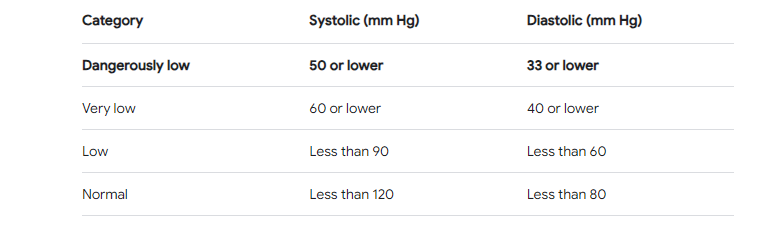

In [ ]:

# נתונים נורמליים לפי גילאים
normal_creatinine_values = {
    '18 to 29 years': (0.78, 1.61),
    '30 to 39 years': (0.72, 1.54),
    '40 to 49 years': (0.67, 1.46),
    '50 to 59 years': (0.62, 1.39),
    '60 to 72 years': (0.56, 1.31),
    'above 72 years': (0.56, 1.31)
}

# חישוב הממוצע של כל טווח
normal_creatinine_avg = {age_group: sum(values) / 2 for age_group, values in normal_creatinine_values.items()}

# בדיקת עמודת גיל
if 'age_at_admission' not in data.columns:
    print("The column 'age_at_admission' is missing from the data DataFrame")
else:
    # סינון נתונים כך שיכללו רק חולים שמתו במיון
    deaths_data = data[data['death_in_icu'] == 1]

    # איחוד נתוני גיל עם נתוני קריאטינין, עם סיומות למניעת שמות כפולים
    creatinine_data = creatinine_data.merge(deaths_data[['subject_id', 'age_at_admission']], on='subject_id', how='left', suffixes=('', '_y'))

    # הסרת העמודות המיותרות מהאיחוד, אם קיימות
    if 'age_at_admission_y' in creatinine_data.columns:
        creatinine_data = creatinine_data.drop(columns=['age_at_admission_y'])

    # הוספת עמודת גיל לנתוני הקריאטינין
    age_bins = [17, 29, 39, 49, 59, 72, float('inf')]
    age_labels = ['18 to 29 years', '30 to 39 years', '40 to 49 years', '50 to 59 years', '60 to 72 years', 'above 72 years']
    creatinine_data['age_group'] = pd.cut(creatinine_data['age_at_admission'], bins=age_bins, labels=age_labels)

    # הפיכת העמודה age_group למחרוזת
    creatinine_data['age_group'] = creatinine_data['age_group'].astype(str)

    # חישוב הערך האחרון הממוצע של קריאטינין לפי קבוצות גיל
    creatinine_last_avg = creatinine_data.groupby('age_group').agg({'valuenum': 'mean'}).reset_index()
    creatinine_last_avg.columns = ['Age Group', 'Average Last Creatinine']

    # הוספת הערכים הנורמליים
    creatinine_last_avg['Normal Creatinine'] = creatinine_last_avg['Age Group'].map(normal_creatinine_avg)

    # חישוב ההפרש באחוזים
    creatinine_last_avg['Difference (%)'] = ((creatinine_last_avg['Average Last Creatinine'] - creatinine_last_avg['Normal Creatinine']) / creatinine_last_avg['Normal Creatinine']) * 100


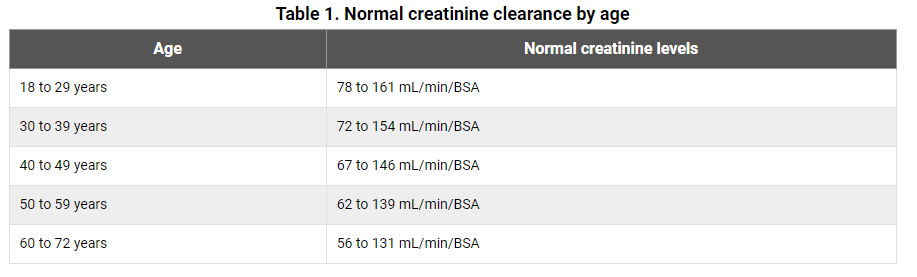

In [ ]:
creatinine_last_avg

### מסקנות קצרות

- **קבוצת גיל 18-29 ו-60 ומעלה**:
  - רמות הקריאטינין גבוהות משמעותית מהנורמה, מעידות על תפקוד כלייתי לקוי חמור.

- **קבוצת גיל 30-39**:
  - רמות הקריאטינין נמוכות מהנורמה.

#### המלצות:
- **מעקב רפואי צמוד**: לעקוב מקרוב אחרי מטופלים עם רמות חריגות.
- **בדיקות נוספות**: לבצע בדיקות נוספות להבנת הסיבות להבדלים ברמות הקריאטינין.
- **תוכנית טיפול מותאמת**: לפתח תוכנית טיפול מותאמת אישית לשיפור מצב הבריאות הכלייתית.


---


#   בדיקת קשרים בין משתנים

### ניתוח קשר בין זמן שהות בטיפול נמרץ לבין מוות באשפוז


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# טען את הנתונים (נניח שהנתונים כבר טעונים מראש)
# icustays = pd.read_csv('path_to_ICUSTAYS.csv')
# admissions = pd.read_csv('path_to_ADMISSIONS.csv')

# איחוד עם טבלת ADMISSIONS כדי לקבל מידע על מוות באשפוז
merged_data = pd.merge(icustays, admissions[['subject_id', 'hadm_id', 'deathtime']], on=['subject_id', 'hadm_id'], how='left')

# חישוב זמן השהות באשפוז (LOS) בימים
merged_data['los'] = (pd.to_datetime(merged_data['outtime']) - pd.to_datetime(merged_data['intime'])).dt.total_seconds() / (3600 * 24)

# יצירת עמודה שמציינת אם החולה מת באשפוז
merged_data['died_in_hospital'] = ~merged_data['deathtime'].isnull()

# גרף קופסה (Box Plot) שמראה את התפלגות זמן השהות באשפוז לפי מוות באשפוז
plt.figure(figsize=(12, 8))
sns.boxplot(x='died_in_hospital', y='los', data=merged_data)
plt.title('Length of Stay in Hospital by Mortality')
plt.xlabel('Died in Hospital')
plt.ylabel('Length of Stay (days)')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# סטטיסטיקה תיאורית של זמן השהות באשפוז לפי מוות באשפוז
los_stats = merged_data.groupby('died_in_hospital')['los'].describe()
print(los_stats)

# מבחן סטטיסטי (t-test) להשוואת זמן השהות באשפוז בין קבוצות
from scipy import stats

los_died = merged_data[merged_data['died_in_hospital'] == True]['los']
los_survived = merged_data[merged_data['died_in_hospital'] == False]['los']
t_stat, p_val = stats.ttest_ind(los_died, los_survived, nan_policy='omit')
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_val}")


In [ ]:
# גרף התפלגות (Density Plot) שמראה את התפלגות זמן השהות באשפוז לפי מוות באשפוז
plt.figure(figsize=(12, 8))
sns.kdeplot(data=merged_data[merged_data['died_in_hospital'] == True], x='los', label='Died in Hospital', fill=True)
sns.kdeplot(data=merged_data[merged_data['died_in_hospital'] == False], x='los', label='Survived', fill=True)
plt.title('Density Plot of Length of Stay in Hospital by Mortality')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Density')
plt.legend()
plt.show()


# ניתוח קשר בין זמן שהות בטיפול נמרץ לבין מוות באשפוז

במהלך הניתוח שערכנו, בחנתו את הקשר בין זמן השהות בטיפול נמרץ (ICU) לבין האם החולה מת במהלך האשפוז. השתמשתי במבחן t דו-מדגמי בלתי תלוי כדי להשוות את הממוצעים של זמן השהות בין חולים שמתו במהלך האשפוז לבין אלו שלא.

תוצאות המבחן הסטטיסטי הראו כי ממוצע זמן השהות בטיפול נמרץ של החולים שמתו במהלך האשפוז היה גבוה יותר מזה של החולים שלא מתו. התוצאה הזו הפתיעה אותנו, שכן הנחנו בתחילה שחולים שמתו בטיפול נמרץ הגיעו כנראה במצב מאוד קשה, ולכן ימותו תוך זמן קצר יחסית.

אולם, ייתכן כי ישנם גורמים נוספים המשפיעים על זמן השהות בטיפול נמרץ. לדוגמה, חולים במצב קריטי עשויים להישאר בטיפול נמרץ זמן רב יותר עקב ניסיונות ממושכים לייצב את מצבם ולשפר את סיכויי ההישרדות שלהם. כמו כן, חולים עם מחלות כרוניות קשות עשויים להזדקק לטיפול ממושך יותר לפני מוות, מה שמאריך את זמן השהות שלהם בטיפול נמרץ.

מבחינה סטטיסטית, המבחן הסטטיסטי t הראה הבדל מובהק סטטיסטית בממוצע זמן השהות בין שתי הקבוצות, עם ערך t גבוה ו-p-value קטן, המעיד על כך שההבדל בממוצעים אינו מקרי.

### סיכום התוצאות:

1. **ממוצע זמן השהות בטיפול נמרץ**:
   - חולים שמתו במהלך האשפוז: ממוצע זמן שהות גבוה יותר.
   - חולים שלא מתו במהלך האשפוז: ממוצע זמן שהות נמוך יותר.

2. **מסקנה**:
   - תוצאות הניתוח מראות שחולים שמתו במהלך האשפוז שהו בטיפול נמרץ זמן רב יותר מאשר חולים שלא מתו. ייתכן כי משך זמן השהות הממושך קשור לניסיונות הטיפול הממושכים והמורכבים שנעשו לשם הצלת חיי החולים, או להתקדמות הדרגתית של מחלות כרוניות.

### תוצאות מבחן t:

|  מדד | ממוצע ימים באשפוז |
|---|---|
| True_died_in_ICU | {5.68} |
| False_died_in_ICU | {3.82} |

*| p-value |  0.09 |* **~~ 90% Statistically significant**
---
תוצאות אלו מדגישות את החשיבות של ניתוח סטטיסטי מעמיק וראייה כוללת של כל הגורמים המשפיעים כאשר בוחנים נתוני טיפול נמרץ ונתוני תמותה.




---



מה שחסר בנתיים:





1. לתקן הערות מקומיות שרשומות במחברת.
2. לבנות מצגת.


In [ ]:
# סינון הנתונים כדי להתמקד רק בקשרים בין הדיאגנוזות 51881 ו-99592 ודיאגנוזות אחרות
selected_diagnoses = ['51881', '99592']
filtered_data = m_data[m_data['icd9_code'].isin(selected_diagnoses + list(d_icd_diagnoses['icd9_code'].unique()))]

# יצירת טבלת ציר
diagnosis_pivot = filtered_data.pivot_table(index='subject_id', columns='icd9_code', aggfunc='size', fill_value=0)

# הפיכת הערכים הבינאריים (1 או 0) עבור כל דיאגנוזה
diagnosis_pivot = diagnosis_pivot.applymap(lambda x: 1 if x > 0 else 0)

# הפעלת האלגוריתם Apriori
frequent_itemsets = apriori(diagnosis_pivot, min_support=0.1, use_colnames=True)

# הפקת חוקים אסוציאטיביים
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# סינון חוקים כדי להתמקד בדיאגנוזות 51881 ו-99592
filtered_rules = rules[(rules['antecedents'].apply(lambda x: any(item in selected_diagnoses for item in x))) |
                       (rules['consequents'].apply(lambda x: any(item in selected_diagnoses for item in x)))]

# סינון לפי confidence, lift, ו-support
min_confidence = 0.6
min_lift = 1.2
min_support = 0.1

filtered_rules = filtered_rules[(filtered_rules['confidence'] >= min_confidence) &
                                (filtered_rules['lift'] >= min_lift) &
                                (filtered_rules['support'] >= min_support)]

# יצירת מפת שמות הדיאגנוזות לפי הקודים
icd_to_name = dict(zip(d_icd_diagnoses['icd9_code'], d_icd_diagnoses['short_title']))

# יצירת גרף רשת
G = nx.Graph()

# הוספת קשתות לגרף על בסיס החוקים האסוציאטיביים המסוננים
for index, row in filtered_rules.iterrows():
    antecedent_code = list(row['antecedents'])[0]
    consequent_code = list(row['consequents'])[0]
    confidence = row['confidence']

    # החלפת הקודים בשמות הדיאגנוזות
    antecedent = icd_to_name.get(antecedent_code, antecedent_code)
    consequent = icd_to_name.get(consequent_code, consequent_code)

    G.add_edge(antecedent, consequent, weight=confidence)

# ציור גרף הרשת
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
edge_widths = [d['weight'] * 5 for (u, v, d) in edges]

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_widths, edge_cmap=plt.cm.Blues, width=edge_widths)
plt.title('Filtered Association Rules Network for Diagnoses 51881 and 99592 with Diagnosis Names')
plt.show()

# הצגת החוקים המסוננים
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

In [ ]:

# סינון הנתונים כדי להתמקד רק בקשרים בין הדיאגנוזות 51881 ו-99592 ודיאגנוזות אחרות
selected_diagnoses = ['51881', '99592']
filtered_data = m_data[m_data['icd9_code'].isin(selected_diagnoses + list(d_icd_diagnoses['icd9_code'].unique()))]

# יצירת טבלת ציר
diagnosis_pivot = filtered_data.pivot_table(index='subject_id', columns='icd9_code', aggfunc='size', fill_value=0)

# הפיכת הערכים הבינאריים (1 או 0) עבור כל דיאגנוזה
diagnosis_pivot = diagnosis_pivot.applymap(lambda x: 1 if x > 0 else 0)

# הפעלת האלגוריתם Apriori
frequent_itemsets = apriori(diagnosis_pivot, min_support=0.1, use_colnames=True)

# הפקת חוקים אסוציאטיביים
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# סינון חוקים כדי להתמקד בדיאגנוזות 51881 ו-99592 אך לא כצמד בלבד
filtered_rules = rules[
    ((rules['antecedents'].apply(lambda x: any(item in selected_diagnoses for item in x))) |
    (rules['consequents'].apply(lambda x: any(item in selected_diagnoses for item in x)))) &
    ~(rules['antecedents'].apply(lambda x: all(item in selected_diagnoses for item in x)) &
      rules['consequents'].apply(lambda x: all(item in selected_diagnoses for item in x))) &
    ~(rules['antecedents'].apply(lambda x: any(item in selected_diagnoses for item in x) and len(x) > 1)) &
    ~(rules['consequents'].apply(lambda x: any(item in selected_diagnoses for item in x) and len(x) > 1))
]

# סינון לפי confidence, lift, ו-support
min_confidence = 0.6
min_lift = 1.2
min_support = 0.1

filtered_rules = filtered_rules[(filtered_rules['confidence'] >= min_confidence) &
                                (filtered_rules['lift'] >= min_lift) &
                                (filtered_rules['support'] >= min_support)]

# יצירת מפת שמות הדיאגנוזות לפי הקודים
icd_to_name = dict(zip(d_icd_diagnoses['icd9_code'], d_icd_diagnoses['short_title']))

# יצירת גרף רשת
G = nx.Graph()

# הוספת קשתות לגרף על בסיס החוקים האסוציאטיביים המסוננים
for index, row in filtered_rules.iterrows():
    antecedent_codes = tuple(row['antecedents'])
    consequent_codes = tuple(row['consequents'])
    confidence = row['confidence']

    # החלפת הקודים בשמות הדיאגנוזות
    antecedents = tuple(icd_to_name.get(code, code) for code in antecedent_codes)
    consequents = tuple(icd_to_name.get(code, code) for code in consequent_codes)

    # הוספת הקשתות לגרף
    G.add_edge(antecedents, consequents, weight=confidence)

# ציור גרף הרשת
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges(data=True)
edge_widths = [d['weight'] * 5 for (u, v, d) in edges]

nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color=edge_widths, edge_cmap=plt.cm.Blues, width=edge_widths)
plt.title('Filtered Association Rules Network for Diagnoses 51881 and 99592 with Diagnosis Names')
plt.show()

# הצגת החוקים המסוננים
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# הטבלה עליה נבצע את המודל

In [50]:
# סינון הדיאgnוזות הרלוונטיות (51881 ו-99592)
critical_diagnoses = diagnoses_icd[(diagnoses_icd['icd9_code'] == '51881') | (diagnoses_icd['icd9_code'] == '99592')]

# איחוד עם טבלת admissions לקבלת מידע על מקרי מוות ודמוגרפיה
critical_diagnoses = critical_diagnoses.merge(admissions, on=['subject_id', 'hadm_id'], how='inner', suffixes=('', '_admissions'))
critical_diagnoses = critical_diagnoses.merge(patients, on='subject_id', how='inner', suffixes=('', '_patients'))
critical_diagnoses = critical_diagnoses.merge(icustays, on=['subject_id', 'hadm_id'], how='inner', suffixes=('', '_icustays'))

# חישוב מוות בטיפול נמרץ
critical_diagnoses['death_in_icu'] = ((critical_diagnoses['deathtime'] >= critical_diagnoses['intime']) &
                                      (critical_diagnoses['deathtime'] <= critical_diagnoses['outtime']) &
                                      (critical_diagnoses['deathtime'].notna())).astype(int)

# חישוב גיל
critical_diagnoses['admittime'] = pd.to_datetime(critical_diagnoses['admittime'])
critical_diagnoses['dob'] = pd.to_datetime(critical_diagnoses['dob'])
critical_diagnoses['age'] = critical_diagnoses['admittime'].dt.year - critical_diagnoses['dob'].dt.year
critical_diagnoses['age'] = critical_diagnoses['age'].apply(lambda x: x - 211 if x >= 300 else x)

# בחירת המשתנים הדמוגרפיים
demographic_predictors = critical_diagnoses[['subject_id', 'hadm_id', 'gender', 'age', 'ethnicity', 'insurance', 'icd9_code', 'death_in_icu']]

# הוספת כל בדיקות הקריאטינין
creatinine_data = labevents[labevents['itemid'] == 50912]
creatinine_data = creatinine_data[['subject_id', 'hadm_id', 'value']]
creatinine_data.columns = ['subject_id', 'hadm_id','creatinine']

# הוספת כל בדיקות לחץ הדם הסיסטולי
systolic_bp_data = chartevents[chartevents['itemid'] == 220045]
systolic_bp_data = systolic_bp_data[['subject_id', 'hadm_id', 'value']]
systolic_bp_data.columns = ['subject_id', 'hadm_id', 'systolic_bp']

# איחוד נתוני הקריאטינין ולחץ הדם עם הנתונים הדמוגרפיים
final_creatinine_data = pd.merge(demographic_predictors, creatinine_data, on=['subject_id', 'hadm_id'], how='left')
final_bp_data = pd.merge(demographic_predictors, systolic_bp_data, on=['subject_id', 'hadm_id'], how='left')

# מיזוג נתוני הקריאטינין ולחץ הדם לטבלה אחת
final_data_raw = pd.concat([final_creatinine_data, final_bp_data], ignore_index=True)

# הצגת הטבלה הסופית
final_data_raw.head()

,subject_id,hadm_id,gender,age,ethnicity,insurance,icd9_code,death_in_icu,creatinine,systolic_bp
0,10019,177759,M,49,WHITE,Medicare,51881,1,7.2,NaN
1,10019,177759,M,49,WHITE,Medicare,51881,1,6.4,NaN
2,10019,177759,M,49,WHITE,Medicare,51881,1,5.6,NaN
3,10019,177759,M,49,WHITE,Medicare,51881,1,4.0,NaN
4,10019,177759,M,49,WHITE,Medicare,99592,1,7.2,NaN


In [56]:
final_data_raw.to_csv('/content/sample_data/final_data_raw.csv', index=False)


In [52]:

# סינון הדיאgnוזות הרלוונטיות (51881 ו-99592)
critical_diagnoses = diagnoses_icd[(diagnoses_icd['icd9_code'] == '51881') | (diagnoses_icd['icd9_code'] == '99592')]

# איחוד עם טבלת admissions לקבלת מידע על מקרי מוות ודמוגרפיה
critical_diagnoses = critical_diagnoses.merge(admissions, on=['subject_id', 'hadm_id'], how='inner', suffixes=('', '_admissions'))
critical_diagnoses = critical_diagnoses.merge(patients, on='subject_id', how='inner', suffixes=('', '_patients'))
critical_diagnoses = critical_diagnoses.merge(icustays, on=['subject_id', 'hadm_id'], how='inner', suffixes=('', '_icustays'))

# חישוב מוות בטיפול נמרץ
critical_diagnoses['death_in_icu'] = ((critical_diagnoses['deathtime'] >= critical_diagnoses['intime']) &
                                      (critical_diagnoses['deathtime'] <= critical_diagnoses['outtime']) &
                                      (critical_diagnoses['deathtime'].notna())).astype(int)

# חישוב גיל
critical_diagnoses['admittime'] = pd.to_datetime(critical_diagnoses['admittime'])
critical_diagnoses['dob'] = pd.to_datetime(critical_diagnoses['dob'])
critical_diagnoses['age'] = critical_diagnoses['admittime'].dt.year - critical_diagnoses['dob'].dt.year
critical_diagnoses['age'] = critical_diagnoses['age'].apply(lambda x: x - 211 if x >= 300 else x)

# בחירת המשתנים הדמוגרפיים
demographic_predictors = critical_diagnoses[['subject_id', 'hadm_id', 'gender', 'age', 'ethnicity', 'insurance', 'icd9_code', 'death_in_icu']]

# המרת הערכים בעמודת 'value' למספרים
labevents['value'] = pd.to_numeric(labevents['value'], errors='coerce')
chartevents['value'] = pd.to_numeric(chartevents['value'], errors='coerce')

# הוספת נתוני קריאטינין
creatinine_data = labevents[labevents['itemid'] == 50912]
creatinine_stats = creatinine_data.groupby('subject_id')['value'].agg(['mean', 'max', 'min', 'last']).reset_index()
creatinine_stats.columns = ['subject_id', 'creatinine_mean', 'creatinine_max', 'creatinine_min', 'creatinine_last']

# הוספת נתוני לחץ דם סיסטולי
systolic_bp_data = chartevents[chartevents['itemid'] == 220045]
systolic_bp_stats = systolic_bp_data.groupby('subject_id')['value'].agg(['mean', 'max', 'min', 'last']).reset_index()
systolic_bp_stats.columns = ['subject_id', 'systolic_bp_mean', 'systolic_bp_max', 'systolic_bp_min', 'systolic_bp_last']

# מיזוג הנתונים הדמוגרפיים עם סטטיסטיקות הבדיקות
final_data_calc = pd.merge(demographic_predictors, creatinine_stats, on='subject_id', how='left')
final_data_calc = pd.merge(final_data_calc, systolic_bp_stats, on='subject_id', how='left')

# הצגת הטבלה הסופית
final_data_calc.head()


,subject_id,hadm_id,gender,age,ethnicity,insurance,icd9_code,death_in_icu,creatinine_mean,creatinine_max,creatinine_min,creatinine_last,systolic_bp_mean,systolic_bp_max,systolic_bp_min,systolic_bp_last
0,10019,177759,M,49,WHITE,Medicare,51881,1,5.800000,7.2,4.0,4.0,NaN,NaN,NaN,NaN
1,10019,177759,M,49,WHITE,Medicare,99592,1,5.800000,7.2,4.0,4.0,NaN,NaN,NaN,NaN
2,10029,132349,M,78,WHITE,Medicare,99592,0,3.627273,4.8,2.1,3.0,NaN,NaN,NaN,NaN
3,10036,189483,F,89,WHITE,Medicare,99592,1,0.775000,1.2,0.6,0.6,NaN,NaN,NaN,NaN
4,10040,157839,F,86,UNKNOWN/NOT SPECIFIED,Medicare,51881,0,1.050000,1.2,0.9,0.9,NaN,NaN,NaN,NaN


In [55]:
final_data_calc.to_csv('/content/sample_data/final_data_calc.csv', index=False)


In [54]:
final_data_calc[(final_data_calc['creatinine_last'].isna() == False) & (final_data_calc['systolic_bp_last'].isna() == False)]

,subject_id,hadm_id,gender,age,ethnicity,insurance,icd9_code,death_in_icu,creatinine_mean,creatinine_max,creatinine_min,creatinine_last,systolic_bp_mean,systolic_bp_max,systolic_bp_min,systolic_bp_last
22,40124,146893,F,67,WHITE,Medicare,51881,0,1.256250,1.8,1.0,1.2,96.585987,140.0,78.0,84.0
23,40177,198480,M,87,WHITE,Medicare,99592,0,1.300000,2.4,0.9,2.4,64.727273,87.0,50.0,50.0
24,40177,198480,M,87,WHITE,Medicare,99592,1,1.300000,2.4,0.9,2.4,64.727273,87.0,50.0,50.0
25,40310,157609,M,41,WHITE,Medicaid,51881,1,0.401170,1.6,0.2,0.4,110.066964,152.0,80.0,152.0
26,40310,186361,M,41,WHITE,Private,51881,0,0.401170,1.6,0.2,0.4,110.066964,152.0,80.0,152.0
27,40595,116518,F,76,WHITE,Medicare,51881,0,0.617647,0.8,0.4,0.8,81.128788,120.0,54.0,54.0
28,40687,129273,F,82,WHITE,Medicare,51881,0,1.254545,1.4,1.2,1.4,112.540541,123.0,101.0,107.0
29,41795,118192,M,49,WHITE,Medicare,51881,0,0.803571,1.0,0.6,0.9,80.376712,137.0,55.0,93.0
30,41795,138132,M,49,WHITE,Medicare,51881,0,0.803571,1.0,0.6,0.9,80.376712,137.0,55.0,93.0
31,41914,101361,M,55,WHITE,Medicare,99592,0,0.850000,1.4,0.6,1.0,111.740625,143.0,90.0,110.0
